# OECD 나라 / 연령대 / 시간대별 인구수 분석

In [22]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns

## 데이터 불러오기

In [196]:
pdata = pd.read_csv('../Data/Population/01_population.csv')
young = pd.read_csv('../Data/Population/02_young_pop.csv')
working = pd.read_csv('../Data/Population/03_working_age_pop.csv')
elderly = pd.read_csv('../Data/Population/04_elderly_pop.csv')
fertility_rates = pd.read_csv('../Data/Population/05_fertility_rates.csv')

In [197]:
pdata = pdata.drop(columns='Flag Codes')
young = young.drop(columns='Flag Codes')
working = working.drop(columns='Flag Codes')
elderly = elderly.drop(columns='Flag Codes')
fertility_rates = fertility_rates.drop(columns='Flag Codes')

In [143]:
pdata['LOCATION'].unique() # 44개국

array(['AUS', 'AUT', 'BEL', 'CAN', 'CZE', 'DNK', 'FIN', 'FRA', 'DEU',
       'GRC', 'HUN', 'ISL', 'IRL', 'ITA', 'JPN', 'KOR', 'LUX', 'MEX',
       'NLD', 'NZL', 'NOR', 'POL', 'PRT', 'SVK', 'ESP', 'SWE', 'CHE',
       'TUR', 'GBR', 'USA', 'BRA', 'CHL', 'COL', 'EST', 'ISR', 'RUS',
       'SVN', 'CHN', 'IND', 'IDN', 'ZAF', 'EU28', 'OECD', 'LVA'],
      dtype=object)

In [144]:
young.sample(10)

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value
1700,GBR,YNGPOP,TOT,PC_POP,A,2001,18.78944
2326,LVA,YNGPOP,TOT,PC_POP,A,1968,21.87390
1695,GBR,YNGPOP,TOT,PC_POP,A,1996,19.39860
2124,OECD,YNGPOP,TOT,PC_POP,A,1981,25.09191
113,AUT,YNGPOP,TOT,PC_POP,A,2009,15.01685
132,BEL,YNGPOP,TOT,PC_POP,A,1969,23.69493
1069,NLD,YNGPOP,TOT,PC_POP,A,1968,27.64810
1880,COL,YNGPOP,TOT,PC_POP,A,1998,33.94334
2102,SVN,YNGPOP,TOT,PC_POP,A,2001,15.56780
70,AUT,YNGPOP,TOT,PC_POP,A,1966,23.61926


In [65]:
pdata.sample(10)

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value
2114,DEU,POP,MEN,MLN_PER,A,2013,39.454000
1186,CZE,POP,WOMEN,MLN_PER,A,1953,4.728395
6469,CHE,POP,WOMEN,MLN_PER,A,1974,3.248081
3601,JPN,POP,TOT,MLN_PER,A,2006,127.770000
3490,JPN,POP,TOT,AGRWTH,A,2013,-0.170176
67,AUS,POP,MEN,MLN_PER,A,1965,5.714500
4849,NOR,POP,TOT,AGRWTH,A,2010,1.248249
7986,EST,POP,TOT,MLN_PER,A,2013,1.317997
6268,SWE,POP,WOMEN,MLN_PER,A,2008,4.635821
51,AUS,POP,TOT,AGRWTH,A,2008,2.021317


### 결측치 확인 
결측치 없음

In [52]:
print(pdata.isnull().sum())
print(young.isnull().sum())
print(working.isnull().sum())
print(elderly.isnull().sum())
print(fertility_rates.isnull().sum())

LOCATION     0
INDICATOR    0
SUBJECT      0
MEASURE      0
FREQUENCY    0
TIME         0
Value        0
dtype: int64
LOCATION     0
INDICATOR    0
SUBJECT      0
MEASURE      0
FREQUENCY    0
TIME         0
Value        0
dtype: int64
LOCATION     0
INDICATOR    0
SUBJECT      0
MEASURE      0
FREQUENCY    0
TIME         0
Value        0
dtype: int64
LOCATION     0
INDICATOR    0
SUBJECT      0
MEASURE      0
FREQUENCY    0
TIME         0
Value        0
dtype: int64
LOCATION     0
INDICATOR    0
SUBJECT      0
MEASURE      0
FREQUENCY    0
TIME         0
Value        0
dtype: int64


### 테이블: 

- pdata: 전체 인구
- young: 15세 미만의 인구 수 
- working : 15이상 64이하의 인구 수
- elderly :65세 이상
- fertility_rates: 출산률

### 컬럼 해석

- LOCATION : 국가
- INDICATOR : 지시자
- SUBJECT : 총 / 남 / 녀
- MEASURE: <br>
        -'AGRWTH'  = Anual Growth Rate 연간 증가율
        -'MLN_PER' = Milion person
        -'PC pop'  = ???
- FREQUENCY : 측정 주기? (A : anual?)
- TIME : 년도
- Value : 값

In [6]:
pdata.dtypes

LOCATION       object
INDICATOR      object
SUBJECT        object
MEASURE        object
FREQUENCY      object
TIME            int64
Value         float64
Flag Codes     object
dtype: object

# 1. 나라별 남녀 성비 차를 알아볼까?

## 나라 별 성별 인구 차 구하는 함수

In [136]:
def sex_dif(location):
    pop = pdata[pdata["LOCATION"] == location]
                
    wom = pop[pop['SUBJECT'] == 'WOMEN'][['TIME', 'Value']]
    wom = wom.set_index('TIME')

    men = pop[pop['SUBJECT'] == 'MEN'][['TIME', 'Value']]
    men = men.set_index('TIME')
                
    dif = men.Value - wom.Value
                
    return dif

### 남녀 성비차 바그래프 그리는 함수(위 함수 뒤에 해야함)

In [141]:
def dif_graph(dif):
    fig = plt.figure(figsize=[16,8]) # Create matplotlib figure
    fig
    dif.plot(kind='bar')

    plt.show()
    return

### 한국의 인구는 얼마나 될까?

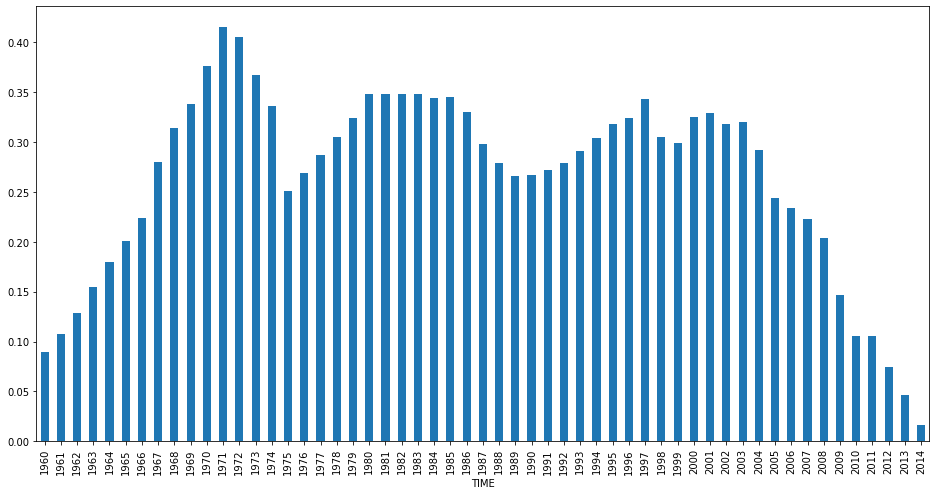

In [139]:
sex_dif('KOR')
dif_graph(dif)

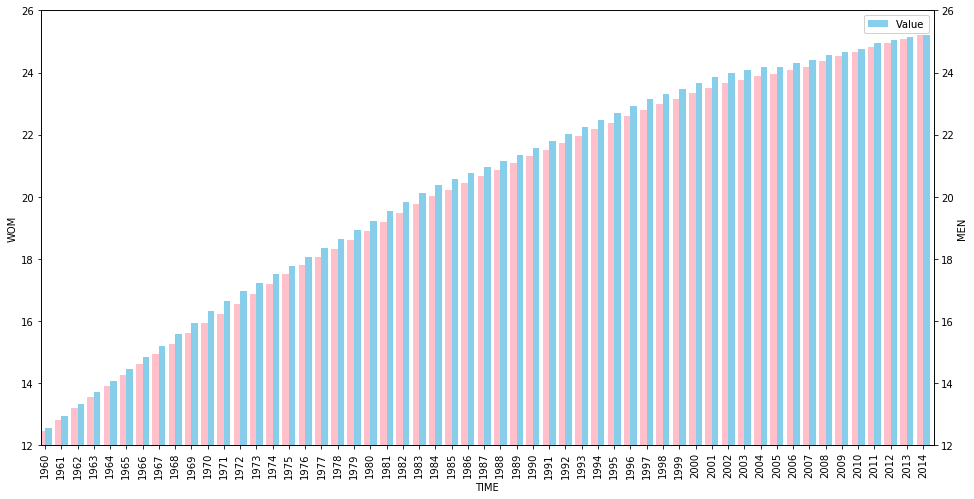

In [142]:
# sns.barplot()

fig = plt.figure(figsize=[16,8]) # Create matplotlib figure
fig

ax = fig.add_subplot(111) # Create matplotlib axes
plt.ylim((12,26))
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
plt.ylim((12,26))

width = 0.4

wom.plot(kind='bar', color='pink', ax=ax, width=width, position=1)
men.plot(kind='bar', color='skyblue', ax=ax2, width=width, position=0)


ax.set_ylabel('WOM')
ax2.set_ylabel('MEN')

plt.show()

In [129]:
total_pop = pdata[pdata['SUBJECT'] == 'TOT']
total_wom = pdata[pdata['SUBJECT'] == 'WOMEN']
total_men = pdata[pdata['SUBJECT'] == 'MEN']
# 년도들
dblist = sorted(list(pdata['TIME'].unique()))
len(dblist) # 1950 ~ 2014
# 연별 결측치 없음

65

In [13]:
young.head(2)

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,YNGPOP,TOT,PC_POP,A,1956,29.38680,NaN
1,AUS,YNGPOP,TOT,PC_POP,A,1957,29.63693,NaN


# 02. 나라별 최근 노령화 지수를 알아보자

### 1) Location, Time 입력하기

In [175]:
def ageing_index(location: str, year: int):
    y = young[(young['LOCATION'] == location) & (young['TIME'] == year)][['Value']]
    e = elderly[(elderly['LOCATION'] == location)&(elderly['TIME'] == year)][['Value']]
    
    result = e.Value/y.Value * 100
    return result

In [177]:
ageing_index('KOR', 2000)

931    34.253034
Name: Value, dtype: float64

### 2) year 입력하면 데이터 있는 나라는 다 보여주기

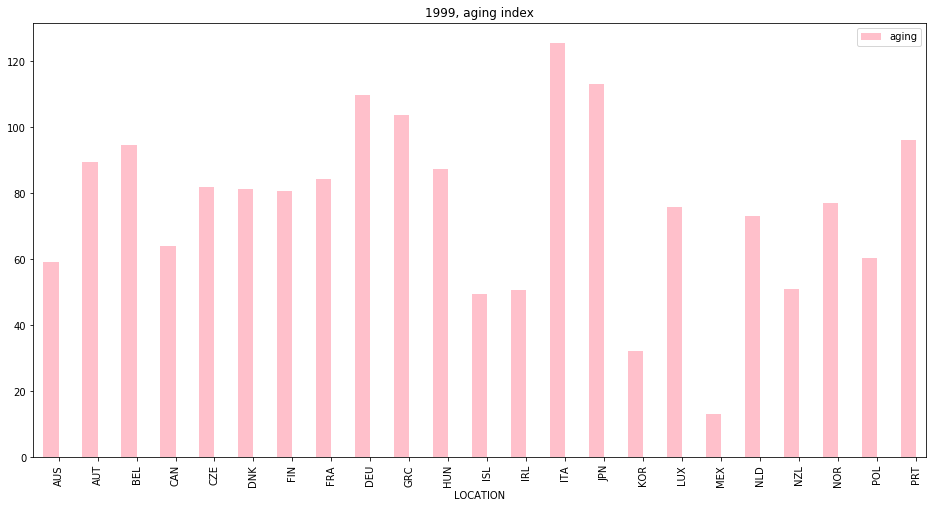

In [238]:
def age_index_all(year : int):
    y = young[young['TIME'] == year][['LOCATION','Value']]
    e = elderly[elderly['TIME'] == year][['LOCATION', 'Value']]
    
    y['aging'] = e.Value/y.Value * 100
    
    y = y[y['aging'].isnull() == False]
    
    return y[['LOCATION', 'aging']].set_index('LOCATION')


year = 1999
rse = age_index_all(year)
title = str(year) +', aging index'

#######
#시각화
fig = plt.figure(figsize=[16,8]) # Create matplotlib figure
fig

ax = fig.add_subplot(111) # Create matplotlib axes
#plt.ylim((12,26))
#ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
#plt.ylim((12,26))

width = 0.4

rse.plot(kind='bar', color='pink', ax=ax, width=width, position=1)
plt.title(title)
plt.show()

### 3) year별 다 보여주기


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


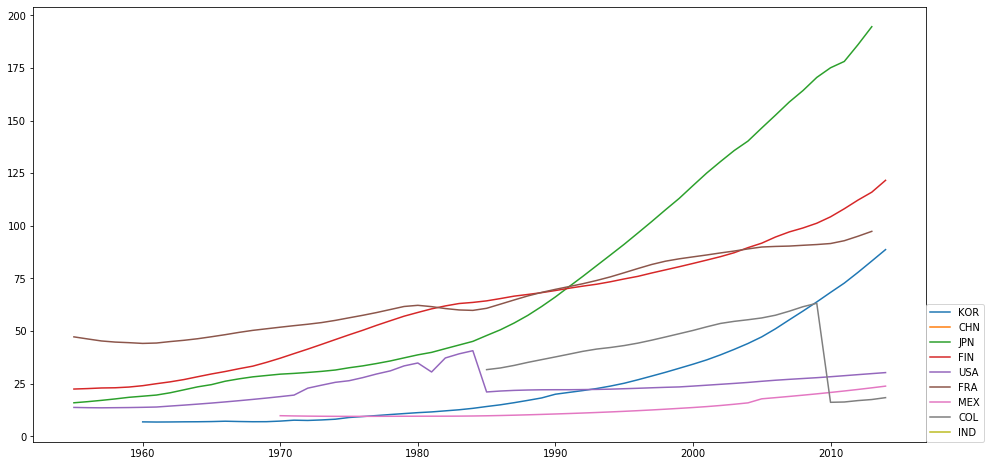

In [244]:
def age_index_year():
    y = young[['TIME','LOCATION','Value']]
    e = elderly[['TIME','LOCATION','Value']]
    
    y['aging'] = e.Value/y.Value * 100
    
    y = y[y['aging'].isnull() == False]
    
    return y[['TIME', 'LOCATION', 'aging']]


rse = age_index_year()
title = 'aging index'

fig = plt.figure(figsize=[16,8]) 
plt.

plt.plot('TIME', 'aging', data=rse[rse['LOCATION'] == 'KOR'], label='KOR')
plt.plot('TIME', 'aging', data=rse[rse['LOCATION'] == 'CHN'], label='CHN')

plt.plot('TIME', 'aging', data=rse[rse['LOCATION'] == 'JPN'], label='JPN')
plt.plot('TIME', 'aging', data=rse[rse['LOCATION'] == 'FIN'], label='FIN')
plt.plot('TIME', 'aging', data=rse[rse['LOCATION'] == 'USA'], label='USA')
plt.plot('TIME', 'aging', data=rse[rse['LOCATION'] == 'FRA'], label='FRA')

plt.plot('TIME', 'aging', data=rse[rse['LOCATION'] == 'MEX'], label='MEX')
plt.plot('TIME', 'aging', data=rse[rse['LOCATION'] == 'COL'], label='COL')
plt.plot('TIME', 'aging', data=rse[rse['LOCATION'] == 'IND'], label='IND')


plt.legend(loc=[1,0])